# ExoEvo
A tool for simulating thermal evolution of model planets.

In [1]:
import numpy as np
#import time
import evolve
import fromexo
import getall as get

import matplotlib.pyplot as plt
%matplotlib inline

from getall import Pe as Pe #print scientific notation, 4 decimal
from getall import Pf as Pf #print float, 4 decimal

print('Available minerals:', get.keys['minerals'])

Available minerals: ['forsterite', 'fayalite', 'orthoenstatite', 'clinoenstatite', 'periclase', 'corundum', 'spinel', 'diopside', 'diamond', 'ca-al pyroxene']


## User input values:

In [2]:
mineral='forsterite'   #Planet composition
mode='dynamic'      #static or dynamic thermal parameters
Mpl=1.0             #Planet mass in Me
Rpl=1.0             #Planet radius in Re
CMF=0.33            #Core mass fraction
CRF=0.5437          #Core radius fraction
Qp=1.0              #Relative heat production per kg mantle, vs Earth
Ts=300.0            #Surface temperature in K
Tp0=2000.0           #starting mantle potential temperature in K
dt=0.1              #timestep size, in Ga
tmax=4.55           #ending time, in Ga


### Build your mantle and acquire its unchanging material properties.

In [3]:
Mp,Mc,Rp,Rc=get.SIunits(Mpl,CMF,Rpl,CRF)
d,Vm,Sa,pm,g=get.build(Mp,Mc,Rp,Rc)
c1,Ev,visc0=get.TdepVisc(mineral)

print('Mp,Mc,Rp,Rc:', Pe(Mp), Pe(Mc), Pe(Rp), Pe(Rc))
print('d,Vm,Sa,pm,g:', Pe(d), Pe(Vm), Pe(Sa), Pf(pm), Pf(g))
print('c1,Ev,visc0:', Pf(c1), Pe(Ev), Pe(visc0))

Mp,Mc,Rp,Rc: 5.9700e+24 1.9701e+24 6.3710e+06 3.4639e+06
d,Vm,Sa,pm,g: 2.9071e+06 9.0911e+20 5.1006e+14 4399.7944 9.8164
c1,Ev,visc0: 0.5000 3.0000e+05 4.0000e+10


### Evolve your planet over time.

In [4]:
Hts=[]             #A list of lists; column names are in get.keys['columns']
t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.
Tp=Tp0
dt=0.05

#start=time.time()
while t <= tmax:
    alpha,cp,k=get.thermals(mineral,Tp)
    
    if mode=='static':
        alpha,cp,k=get.thermals(mineral,1625)
        #alpha,cp,k,pm=3.7e-5,1250.,5.0,3340. #Uncomment for common benchmark values
        
    viscT=get.viscosity(Ev,visc0,Tp)
    Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)
    
    production=evolve.produce_heat(Mp,Mc,Qp,t)
    loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
    dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
    Hts.append([t,Tp-273.15,Ra,production,loss,production/loss])
    
    Tp=Tp+dTp
    t=t+dt
#end=time.time()
Evolution=np.asarray(Hts)

#print("Program running time: ", Pf(end-start), " seconds")
print(get.keys['columns'])
print([Pf(t), Pf(Tp), Pe(Ra), Pe(production), Pe(loss), Pe(production/loss)])

Program running time:  0.0027  seconds
['time', 'temp', 'Ra', 'production', 'loss', 'urey']
['4.6000', '1882.4603', '9.0292e+09', '2.8276e+13', '3.5608e+13', '7.9410e-01']


#### Plot your planet's temperature evolution.

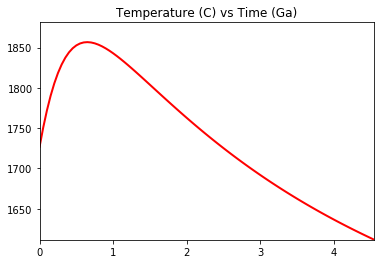

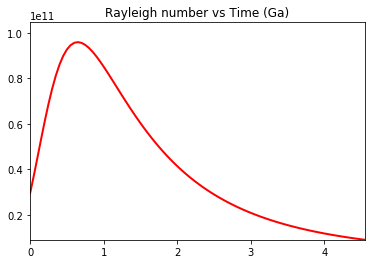

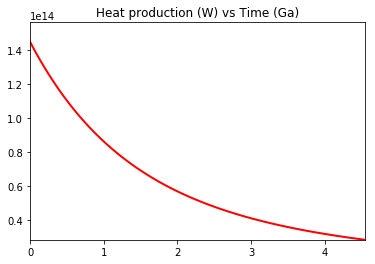

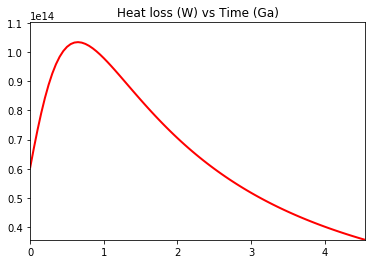

In [5]:
Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (C) vs Time (Ga)")
Rayleighs=evolve.plot_heat(Evolution[:,(0,2)],"Rayleigh number vs Time (Ga)")
Heat_production=evolve.plot_heat(Evolution[:,(0,3)],"Heat production (W) vs Time (Ga)")
Heat_loss=evolve.plot_heat(Evolution[:,(0,4)],"Heat loss (W) vs Time (Ga)")